In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
print(X.shape, y.shape)

(200, 2) (200,)


In [4]:
unique, counts = np.unique(y, return_counts=True)
print(unique, counts)

[0 1 2] [67 67 66]


In [8]:
pd.value_counts(y)

1    67
0    67
2    66
dtype: int64

In [10]:
cluster_df = pd.DataFrame(data=X, columns=['feature1', 'feature2'])
cluster_df['target'] = y
cluster_df.head(3)

,feature1,feature2,target
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0


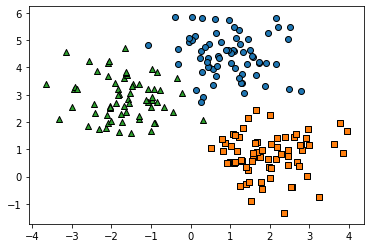

In [12]:
target_list = np.unique(y)

markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for target in target_list:
    target_cluster = cluster_df[cluster_df['target']==target]
    plt.scatter(x=target_cluster['feature1'], y=target_cluster['feature2'], edgecolor='k', marker=markers[target])
plt.show()

In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_df['kmeans_label'] = cluster_labels

In [16]:
# cluster_centers_
centers = kmeans.cluster_centers_
unique_labels = np.unique(cluster_labels)

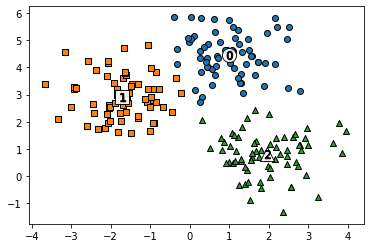

In [18]:
markers = ['o', 's', '^', 'P', 'D', 'H', 'x']

for label in unique_labels:
    label_cluster = cluster_df[cluster_df['kmeans_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['feature1'], y=label_cluster['feature2'], edgecolor='k', marker=markers[label])

    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', alpha=0.9, edgecolor='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', marker='$%d$' % label)
    
plt.show()

In [19]:
print(cluster_df.groupby('target')['kmeans_label'].value_counts())

target  kmeans_label
0       0               66
        1                1
1       2               67
2       1               65
        2                1
Name: kmeans_label, dtype: int64
